# Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import Data

## Import Data
* The data was retrieved from the (BioLINCC)[https://biolincc.nhlbi.nih.gov/teaching/]
* Data from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts which was collected during three examination periods, approximately 6 years apart, from roughly 1956 to 1968
* Missing values in the dataset are indicated by a period (.)
* Disclaimer: This is teaching data that has been rendered anonymous through the application of certain statistical processes such as permutations and/or random visit selection. We cannot claim or imply that any inferences derived from the teaching datasets are valid estimates

## Data Dictionary

|Variable|Description|Levels (if applicable)/<br> Notes|
| --- | --- |---|
|RANDID | Unique identification number for each participant||
|SEX | Participant sex |1=Men <br> 2=Women|
|PERIOD|Examination Cycle|1=Period 1 <br> 2=Period 2 <br> 3=Period 3|
|TIME| Number of days since baseline exam||
|AGE|Age at exam (years)||
|SYSBP|Systolic Blood Pressure (mean of last two of three <br> measurements) (mmHg)|
|DIABP|Diastolic Blood Pressure (mean of last two of three <br> measurements) (mmHg)|
|BPMEDS|Use of Anti-hypertensive medication at exam|0=Not currently used <br> 1=Current Use|
|CURSMOKE|Current cigarette smoking at exam|0=Not current smoker <br> 1=Current smoker|
|CIGPDAY|Number of cigarettes smoked each day|0=Not current smoker <br> 1-90 cigarettes per day|
|TOTCHOL|Serum Total Cholesterol (mg/dL)||
|HDLC|High Density Lipoprotein Cholesterol (mg/dL)|available for period 3 only|
|LDLC|Low Density Lipoprotein Cholesterol (mg/dL)|available for period 3 only|
|BMI|Body Mass Index, weight in kilograms/height <br> meters squared||
|GLUCOSE|Casual serum glucose (mg/dL)||
|DIABETES|Diabetic according to criteria of first exam <br> treated or first exam with casual glucose <br> of 200 mg/dL or more|0=Not a diabetic <br> 1=Diabetic|
|HEARTRTE|Heart rate (Ventricular rate) in beats/min|
|PREVHYP|Prevalent Hypertensive. Subject was defined as <br> hypertensive if treated or if second exam at <br>which mean systolic was >=140 mmHg or mean<br>  Diastolic >=90 mmHg|0=Free of disease <br> 1=Prevalent disease|
|ANYCHD|Angina Pectoris, <br> Myocardial infarction (Hospitalized and silent or unrecognized), <br>Coronary Insufficiency (Unstable Angina), <br> or Fatal Coronary Heart Disease|0=Event did not occur during follow up <br> 1=Event occurred during followup|
|STROKE|Atherothrombotic infarction, <br>Cerebral Embolism, <br>Intracerebral Hemorrhage, <br> or Subarachnoid Hemorrhage, <br> or Fatal Cerebrovascular Disease|0=Event did not occur during follow up <br> 1=Event occurred during followup|
|DEATH|Death from any cause|0=Event did not occur during follow up <br> 1=Event occurred during followup|

In [2]:
framingham = pd.read_csv('/Users/silviacatalina/Google Drive/BethelTech/DS0110-FinalProject/Framingham/Data/csv/frmgham2.csv', na_values=".")
pd.options.display.max_columns = None
framingham.head()

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,educ,PREVCHD,PREVAP,PREVMI,PREVSTRK,PREVHYP,TIME,PERIOD,HDLC,LDLC,DEATH,ANGINA,HOSPMI,MI_FCHD,ANYCHD,STROKE,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,0.0,80.0,77.0,4.0,0,0,0,0,0,0,1,NaN,NaN,0,0,1,1,1,0,1,0,8766,6438,6438,6438,8766,6438,8766,8766
1,2448,1,209.0,52,121.0,66.0,0,0.0,NaN,0,0.0,69.0,92.0,4.0,0,0,0,0,0,4628,3,31.0,178.0,0,0,1,1,1,0,1,0,8766,6438,6438,6438,8766,6438,8766,8766
2,6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,0.0,95.0,76.0,2.0,0,0,0,0,0,0,1,NaN,NaN,0,0,0,0,0,0,0,0,8766,8766,8766,8766,8766,8766,8766,8766
3,6238,2,260.0,52,105.0,69.5,0,0.0,29.43,0,0.0,80.0,86.0,2.0,0,0,0,0,0,2156,2,NaN,NaN,0,0,0,0,0,0,0,0,8766,8766,8766,8766,8766,8766,8766,8766
4,6238,2,237.0,58,108.0,66.0,0,0.0,28.50,0,0.0,80.0,71.0,2.0,0,0,0,0,0,4344,3,54.0,141.0,0,0,0,0,0,0,0,0,8766,8766,8766,8766,8766,8766,8766,8766


In [3]:
framingham.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    11627 non-null  int64  
 1   SEX       11627 non-null  int64  
 2   TOTCHOL   11218 non-null  float64
 3   AGE       11627 non-null  int64  
 4   SYSBP     11627 non-null  float64
 5   DIABP     11627 non-null  float64
 6   CURSMOKE  11627 non-null  int64  
 7   CIGPDAY   11548 non-null  float64
 8   BMI       11575 non-null  float64
 9   DIABETES  11627 non-null  int64  
 10  BPMEDS    11034 non-null  float64
 11  HEARTRTE  11621 non-null  float64
 12  GLUCOSE   10187 non-null  float64
 13  educ      11332 non-null  float64
 14  PREVCHD   11627 non-null  int64  
 15  PREVAP    11627 non-null  int64  
 16  PREVMI    11627 non-null  int64  
 17  PREVSTRK  11627 non-null  int64  
 18  PREVHYP   11627 non-null  int64  
 19  TIME      11627 non-null  int64  
 20  PERIOD    11627 non-null  in

## Data Wrangling

### Selecting Columns of Interest

In [44]:
framingham = framingham[['RANDID', 'SEX', 'PERIOD', 'AGE', 'SYSBP', 'DIABP', 'BPMEDS', 'CURSMOKE', 'CIGPDAY', 'TOTCHOL', 'BMI', 'GLUCOSE', 'DIABETES', 'HEARTRTE', 'PREVHYP', 'ANYCHD', 'STROKE', 'DEATH']]
framingham.head()

,RANDID,SEX,PERIOD,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,DIABETES,HEARTRTE,PREVHYP,ANYCHD,STROKE,DEATH
0,2448,1,1,39,106.0,70.0,0.0,0,0.0,195.0,26.97,77.0,0,80.0,0,1,0,0
1,2448,1,3,52,121.0,66.0,0.0,0,0.0,209.0,NaN,92.0,0,69.0,0,1,0,0
2,6238,2,1,46,121.0,81.0,0.0,0,0.0,250.0,28.73,76.0,0,95.0,0,0,0,0
3,6238,2,2,52,105.0,69.5,0.0,0,0.0,260.0,29.43,86.0,0,80.0,0,0,0,0
4,6238,2,3,58,108.0,66.0,0.0,0,0.0,237.0,28.50,71.0,0,80.0,0,0,0,0


In [45]:
framingham.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    11627 non-null  int64  
 1   SEX       11627 non-null  int64  
 2   PERIOD    11627 non-null  int64  
 3   AGE       11627 non-null  int64  
 4   SYSBP     11627 non-null  float64
 5   DIABP     11627 non-null  float64
 6   BPMEDS    11034 non-null  float64
 7   CURSMOKE  11627 non-null  int64  
 8   CIGPDAY   11548 non-null  float64
 9   TOTCHOL   11218 non-null  float64
 10  BMI       11575 non-null  float64
 11  GLUCOSE   10187 non-null  float64
 12  DIABETES  11627 non-null  int64  
 13  HEARTRTE  11621 non-null  float64
 14  PREVHYP   11627 non-null  int64  
 15  ANYCHD    11627 non-null  int64  
 16  STROKE    11627 non-null  int64  
 17  DEATH     11627 non-null  int64  
dtypes: float64(8), int64(10)
memory usage: 1.6 MB


### Subset data to period 1, remove NAs

In [46]:
framinghamP1 = framingham[framingham['PERIOD'] == 1].copy()
framinghamP1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4434 entries, 0 to 11624
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    4434 non-null   int64  
 1   SEX       4434 non-null   int64  
 2   PERIOD    4434 non-null   int64  
 3   AGE       4434 non-null   int64  
 4   SYSBP     4434 non-null   float64
 5   DIABP     4434 non-null   float64
 6   BPMEDS    4373 non-null   float64
 7   CURSMOKE  4434 non-null   int64  
 8   CIGPDAY   4402 non-null   float64
 9   TOTCHOL   4382 non-null   float64
 10  BMI       4415 non-null   float64
 11  GLUCOSE   4037 non-null   float64
 12  DIABETES  4434 non-null   int64  
 13  HEARTRTE  4433 non-null   float64
 14  PREVHYP   4434 non-null   int64  
 15  ANYCHD    4434 non-null   int64  
 16  STROKE    4434 non-null   int64  
 17  DEATH     4434 non-null   int64  
dtypes: float64(8), int64(10)
memory usage: 658.2 KB


In [47]:
framP1 = framinghamP1.drop('PERIOD', axis =1)
framinghamP1 = framP1.dropna().copy()

In [48]:
framinghamP1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3927 entries, 0 to 11624
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    3927 non-null   int64  
 1   SEX       3927 non-null   int64  
 2   AGE       3927 non-null   int64  
 3   SYSBP     3927 non-null   float64
 4   DIABP     3927 non-null   float64
 5   BPMEDS    3927 non-null   float64
 6   CURSMOKE  3927 non-null   int64  
 7   CIGPDAY   3927 non-null   float64
 8   TOTCHOL   3927 non-null   float64
 9   BMI       3927 non-null   float64
 10  GLUCOSE   3927 non-null   float64
 11  DIABETES  3927 non-null   int64  
 12  HEARTRTE  3927 non-null   float64
 13  PREVHYP   3927 non-null   int64  
 14  ANYCHD    3927 non-null   int64  
 15  STROKE    3927 non-null   int64  
 16  DEATH     3927 non-null   int64  
dtypes: float64(8), int64(9)
memory usage: 552.2 KB


In [50]:
framinghamP1.BPMEDS.unique()

array([0., 1.])

In [51]:
framinghamP1.CIGPDAY.unique()

array([ 0., 20., 30., 23., 15., 10.,  5., 35., 43.,  1., 40.,  3.,  9.,
        2., 12.,  4., 18., 60., 25., 45.,  8., 13., 11.,  7.,  6., 38.,
       50., 29., 55., 17., 16., 19., 70., 14.])

In [52]:
framinghamP1.TOTCHOL.unique()

array([195., 250., 245., 225., 285., 228., 205., 313., 260., 254., 247.,
       294., 332., 221., 232., 291., 190., 234., 215., 270., 272., 295.,
       226., 227., 209., 175., 235., 214., 257., 178., 233., 180., 243.,
       237., 311., 208., 252., 261., 179., 267., 216., 240., 266., 255.,
       185., 220., 212., 223., 300., 302., 200., 189., 258., 202., 183.,
       274., 170., 210., 197., 326., 286., 188., 256., 244., 288., 193.,
       239., 296., 269., 275., 268., 219., 265., 173., 273., 290., 278.,
       264., 282., 241., 213., 303., 246., 150., 187., 154., 279., 293.,
       259., 230., 320., 312., 165., 159., 168., 174., 242., 301., 167.,
       308., 325., 229., 236., 224., 253., 464., 248., 171., 186., 249.,
       176., 163., 196., 194., 310., 164., 135., 238., 207., 342., 287.,
       182., 352., 284., 203., 262., 155., 323., 206., 283., 319., 304.,
       340., 328., 222., 368., 218., 276., 339., 231., 198., 201., 277.,
       177., 199., 292., 305., 152., 161., 181., 31

In [53]:
framinghamP1.GLUCOSE.unique()

array([ 77.,  76.,  70., 103.,  85.,  99.,  78.,  79.,  88.,  61.,  64.,
        84.,  72.,  89.,  65., 113.,  75.,  83.,  66.,  74.,  63.,  73.,
        87., 225.,  90.,  80., 100., 215.,  98.,  95.,  94.,  55.,  82.,
        93.,  45., 202.,  68., 195.,  97., 104.,  96., 126., 120., 105.,
        71.,  56.,  60., 117.,  62., 102.,  58.,  92., 109.,  86., 107.,
        54.,  67., 132.,  69.,  57.,  91., 150.,  59.,  81., 115., 140.,
       112., 118., 114., 160., 110., 123., 108., 145., 122., 137., 106.,
       127., 205., 130., 101.,  47.,  53., 216., 163., 144., 116., 121.,
       172., 111., 124., 366.,  40., 186., 223., 325.,  44., 156., 268.,
       161.,  50., 274., 292., 255., 136., 206., 131., 148., 177.,  43.,
       173.,  48., 386., 155., 285., 147., 170.,  52., 320.,  46., 254.,
       394., 270., 244., 183., 142., 119., 167., 135., 207., 129., 250.,
       294., 166., 125., 332., 368., 348., 248., 370., 193., 191., 256.,
       235., 210., 260.])

In [54]:
framinghamP1.HEARTRTE.unique()

array([ 80.,  95.,  75.,  65.,  85.,  77.,  60.,  79.,  76.,  93.,  72.,
        98.,  64.,  70.,  71.,  62.,  73.,  86.,  90.,  96.,  68.,  63.,
        88.,  78.,  83., 100.,  67.,  84.,  57., 110.,  50.,  74.,  55.,
        92.,  66.,  87.,  81.,  56.,  89.,  82.,  54.,  69.,  52.,  94.,
        61., 140., 130.,  58., 104., 105.,  91.,  53., 108., 106.,  59.,
       107.,  48., 112., 125., 103.,  44.,  47.,  45.,  97., 122., 102.,
       120.,  99., 115., 143., 101.,  46.])

In [55]:
framinghamP1.BPMEDS = framinghamP1.BPMEDS.astype(int)
framinghamP1.CIGPDAY = framinghamP1.CIGPDAY.astype(int)
framinghamP1.TOTCHOL = framinghamP1.TOTCHOL.astype(int)
framinghamP1.GLUCOSE = framinghamP1.GLUCOSE.astype(int)
framinghamP1.HEARTRTE = framinghamP1.HEARTRTE.astype(int)
framinghamP1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3927 entries, 0 to 11624
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    3927 non-null   int64  
 1   SEX       3927 non-null   int64  
 2   AGE       3927 non-null   int64  
 3   SYSBP     3927 non-null   float64
 4   DIABP     3927 non-null   float64
 5   BPMEDS    3927 non-null   int64  
 6   CURSMOKE  3927 non-null   int64  
 7   CIGPDAY   3927 non-null   int64  
 8   TOTCHOL   3927 non-null   int64  
 9   BMI       3927 non-null   float64
 10  GLUCOSE   3927 non-null   int64  
 11  DIABETES  3927 non-null   int64  
 12  HEARTRTE  3927 non-null   int64  
 13  PREVHYP   3927 non-null   int64  
 14  ANYCHD    3927 non-null   int64  
 15  STROKE    3927 non-null   int64  
 16  DEATH     3927 non-null   int64  
dtypes: float64(3), int64(14)
memory usage: 552.2 KB


## Data Exploration

### Pairwise relationships of continuous variables

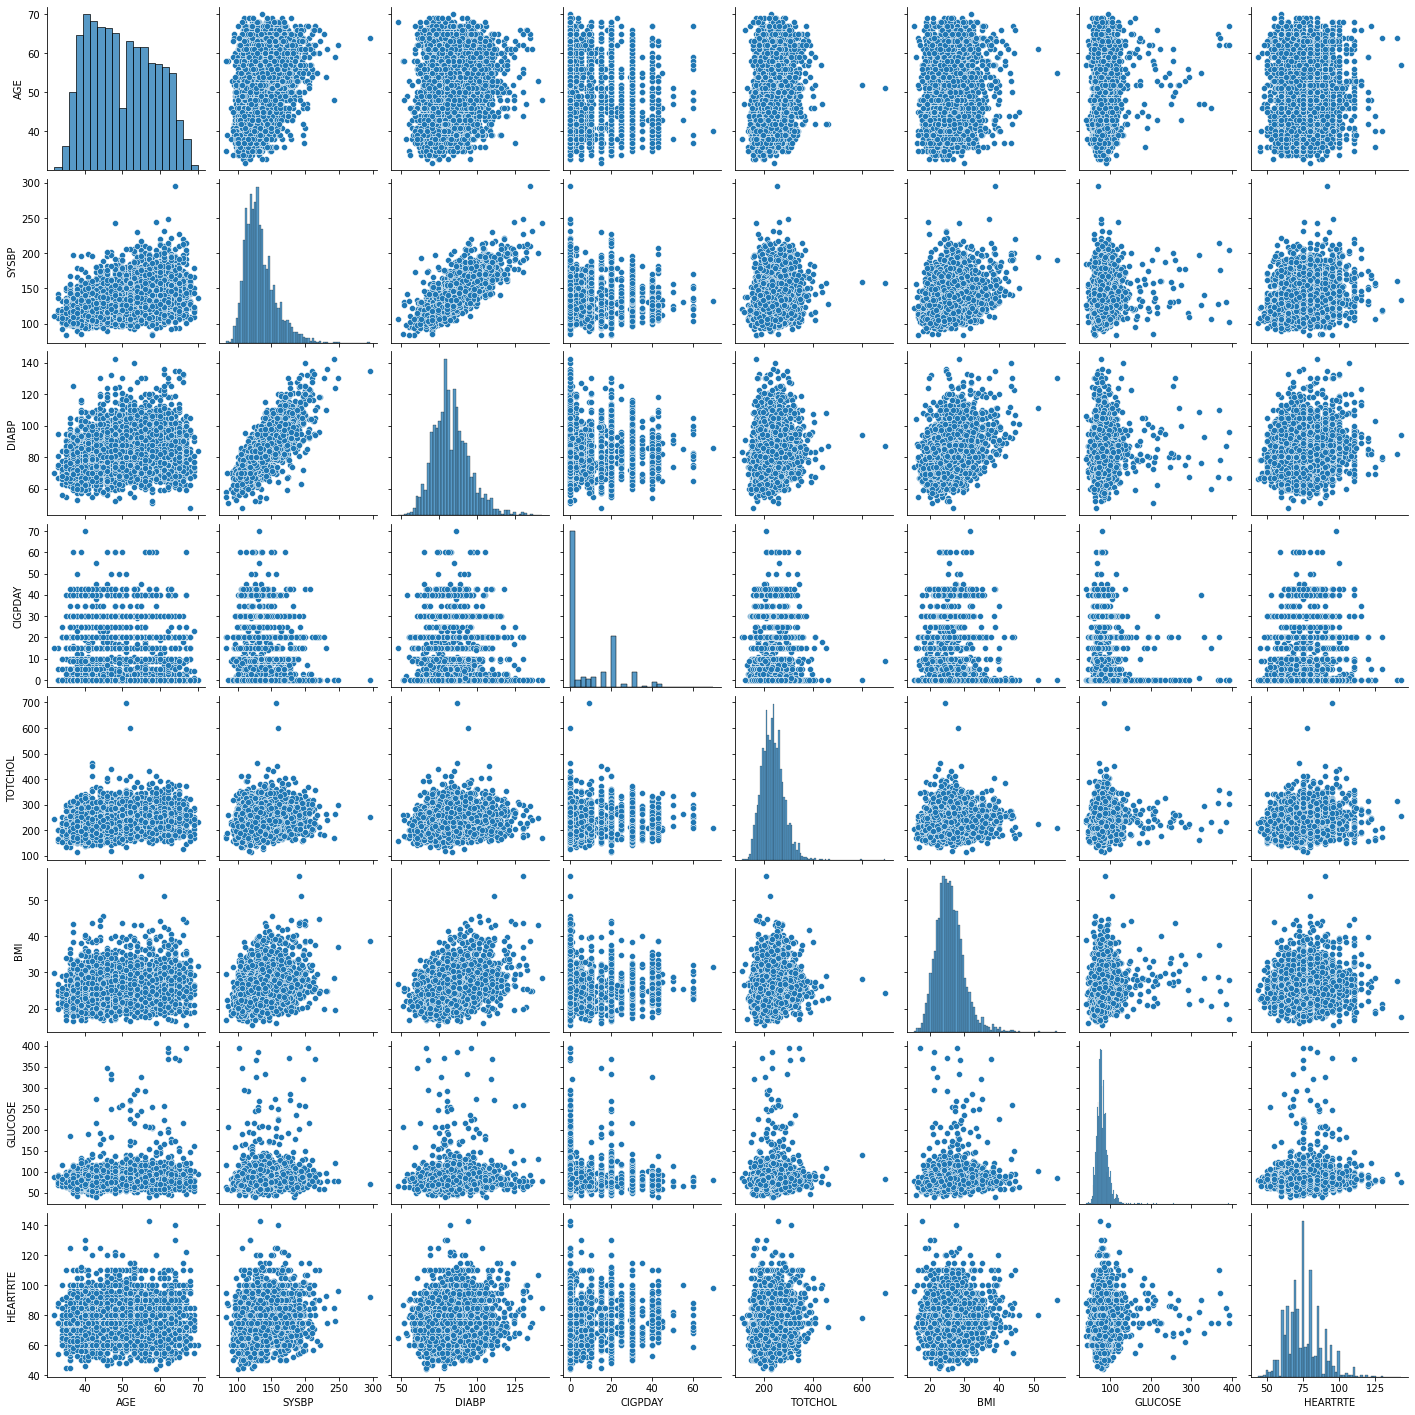

In [56]:
sns.pairplot(framinghamP1, vars =['AGE', 'SYSBP', 'DIABP', 'CIGPDAY', 'TOTCHOL', 'BMI', 'GLUCOSE', 'HEARTRTE'])

<AxesSubplot:>

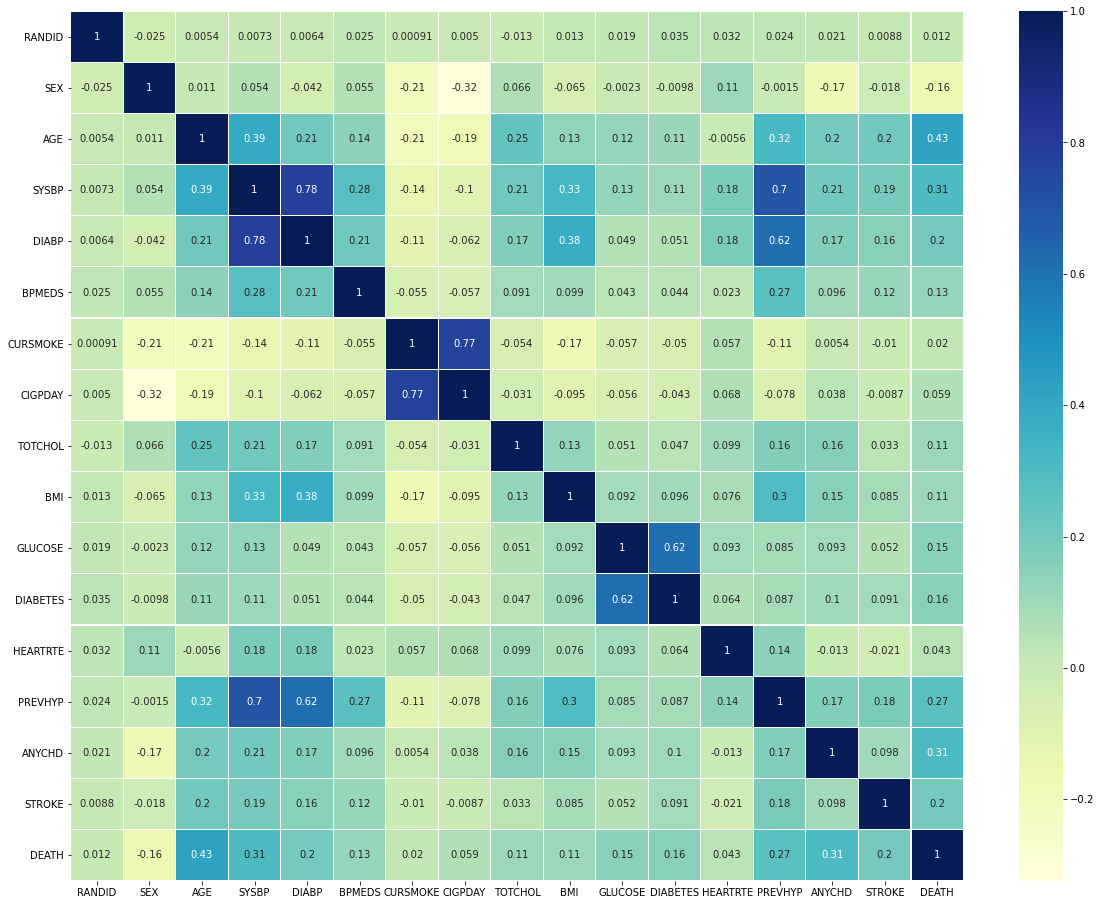

In [57]:
plt.figure(figsize=(20,16))
sns.heatmap(framinghamP1.corr(), cmap ="YlGnBu",linewidths = .1, annot = True)

<Figure size 1440x1152 with 0 Axes>

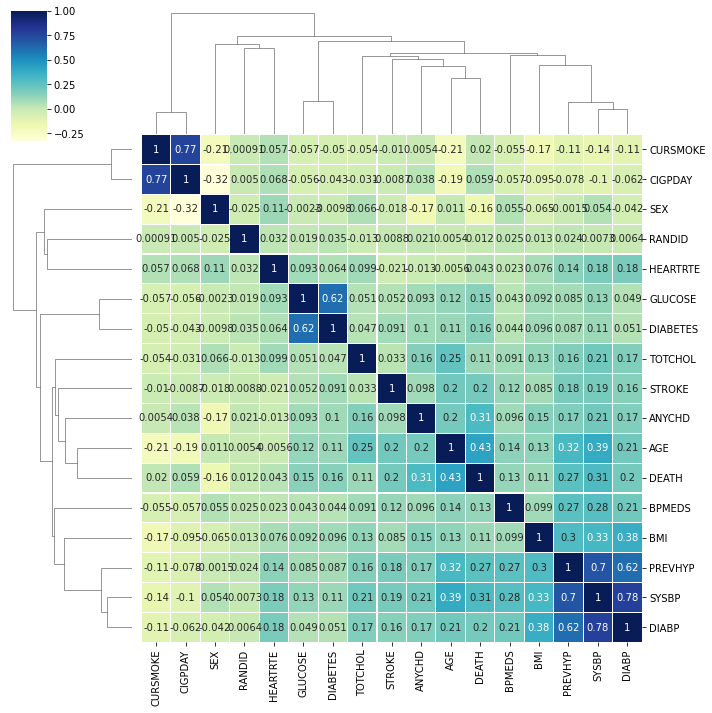

In [58]:
plt.figure(figsize=(20,16))
sns.clustermap(framinghamP1.corr(), cmap ="YlGnBu",linewidths = .1, annot = True)

<Figure size 1440x1152 with 0 Axes>

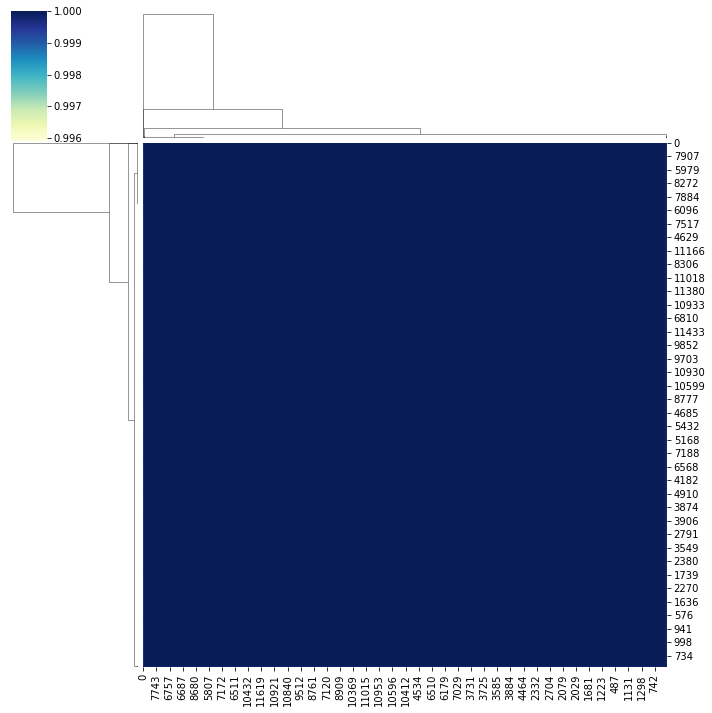

In [18]:
plt.figure(figsize=(20,16))
sns.clustermap(framinghamP1.T.corr(), cmap ="YlGnBu")

## Bar Charts (Categorical Variables)

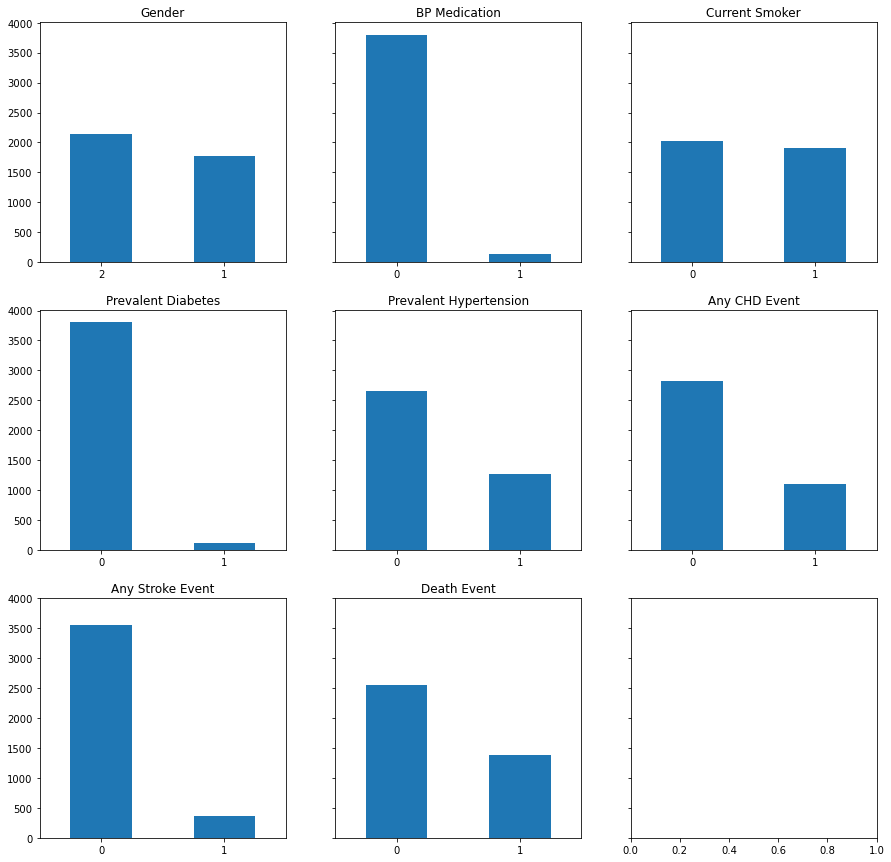

In [59]:
fig, axes = plt.subplots(3, 3, figsize = (15,15), sharey = True)
framinghamP1.SEX.value_counts().plot.bar(title = 'Gender', ax=axes[0,0])
framinghamP1.BPMEDS.value_counts().plot.bar(title ='BP Medication', ax=axes[0,1])
framinghamP1.CURSMOKE.value_counts().plot.bar(title = 'Current Smoker', ax=axes[0,2])
framinghamP1.DIABETES.value_counts().plot.bar(title = 'Prevalent Diabetes', ax=axes[1,0])
framinghamP1.PREVHYP.value_counts().plot.bar(title = 'Prevalent Hypertension', ax=axes[1,1])
framinghamP1.ANYCHD.value_counts().plot.bar(title = 'Any CHD Event', ax=axes[1,2])
framinghamP1.STROKE.value_counts().plot.bar(title = 'Any Stroke Event', ax=axes[2,0])
framinghamP1.DEATH.value_counts().plot.bar(title = 'Death Event', ax=axes[2,1])
for ax in fig.axes:
    ax.tick_params(labelrotation=0)

## Histograms of Continuous Variables

<AxesSubplot:xlabel='HEARTRTE', ylabel='Count'>

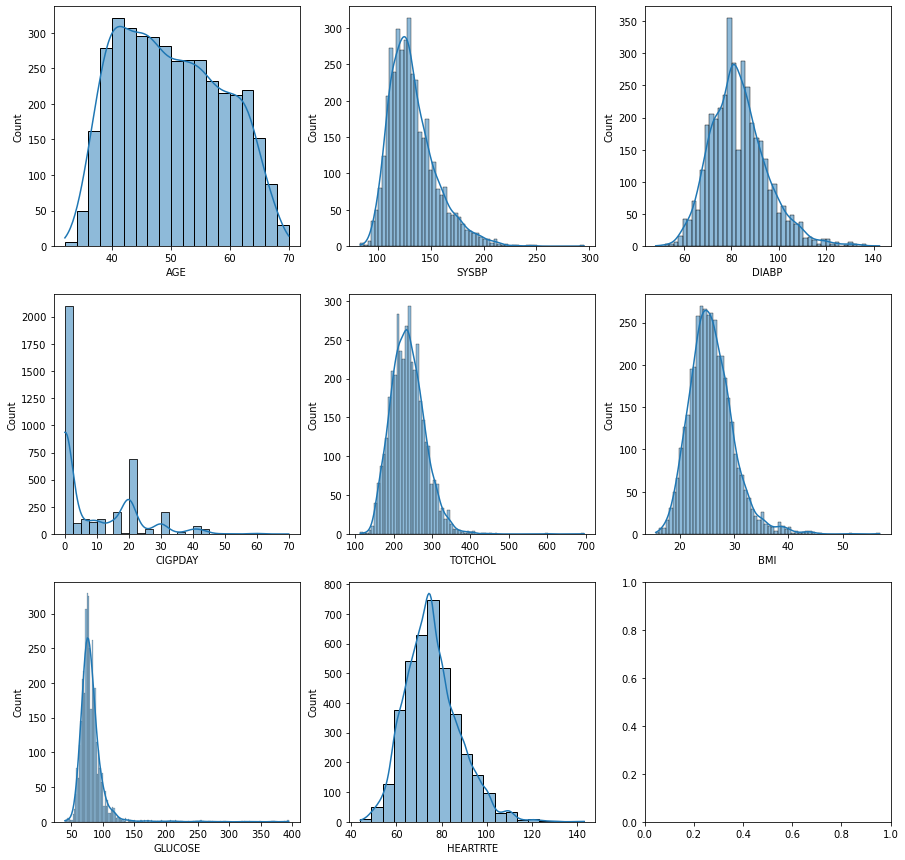

In [63]:
# 'AGE', 'SYSBP', 'DIABP', 'CIGPDAY', 'TOTCHOL', 'BMI', 'GLUCOSE', 'HEARTRTE'
fig, axes = plt.subplots(3,3, figsize = (15,15), sharey = False)
sns.histplot(framinghamP1.AGE, bins=19, kde = True, ax=axes[0,0])
sns.histplot(framinghamP1.SYSBP, kde = True, ax=axes[0,1])
sns.histplot(framinghamP1.DIABP,kde = True, ax=axes[0,2])
sns.histplot(framinghamP1.CIGPDAY, kde = True, ax=axes[1,0])
sns.histplot(framinghamP1.TOTCHOL, kde = True, ax=axes[1,1])
sns.histplot(framinghamP1.BMI, kde = True, ax=axes[1,2])
sns.histplot(framinghamP1.GLUCOSE, kde = True, ax=axes[2,0])
sns.histplot(framinghamP1.HEARTRTE, bins = 20, kde = True, ax=axes[2,1])

### 1. Systolic and Diastolic Blood Pressure (BP)
* Red vertical lines represent the thresholds for a dignosis of __stage 1 hypertension__, i.e. hypertension is diagnosed when an individual has a diastolic blood pressure of 90 or higher __or__ a systolic blood pressure of 130 or higher

<AxesSubplot:xlabel='SYSBP', ylabel='Count'>

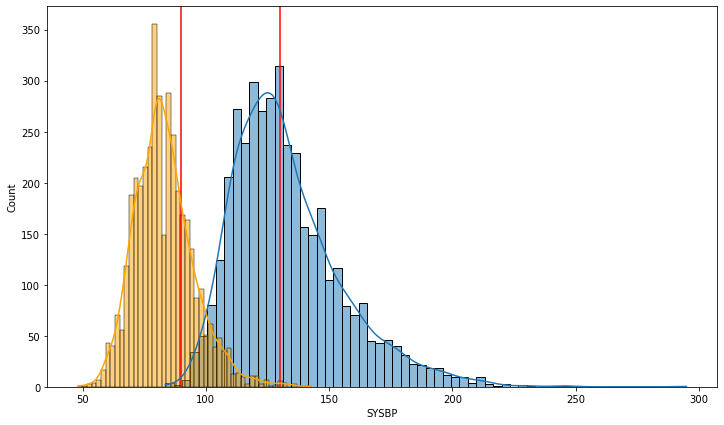

In [64]:
plt.figure(figsize = (12, 7))
plt.axvline(90, color ='red')
plt.axvline(130, color = 'red')
sns.histplot(framinghamP1.SYSBP, kde = True)
sns.histplot(framinghamP1.DIABP, kde = True, color ='orange')

### 2. Systolic Blood Pressure by Predictor Variables

<AxesSubplot:title={'center':'Systolic Blood Pressure by Risk of Coronary Heart Disease'}, xlabel='Systolic Blood Pressure', ylabel='Count'>

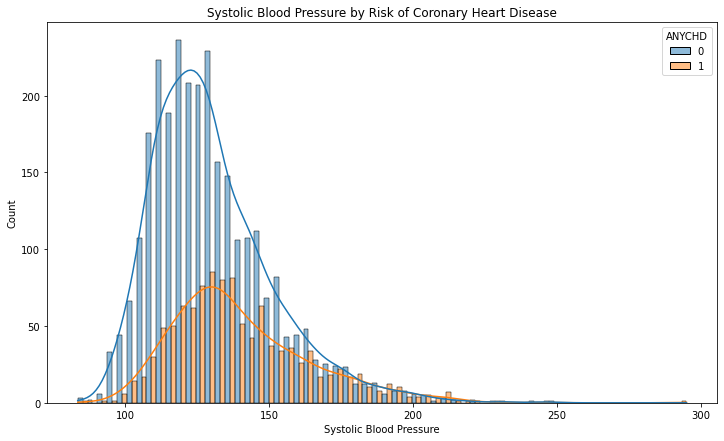

In [65]:
plt.figure(figsize = (12, 7))
plt.title('Systolic Blood Pressure by Risk of Coronary Heart Disease')
plt.xlabel('Systolic Blood Pressure')
sns.histplot(data = framinghamP1, x = 'SYSBP', hue='ANYCHD', multiple= 'dodge', kde = True)

<AxesSubplot:title={'center':'Systolic Blood Pressure by Risk of Stroke'}, xlabel='Systolic Blood Pressure', ylabel='Count'>

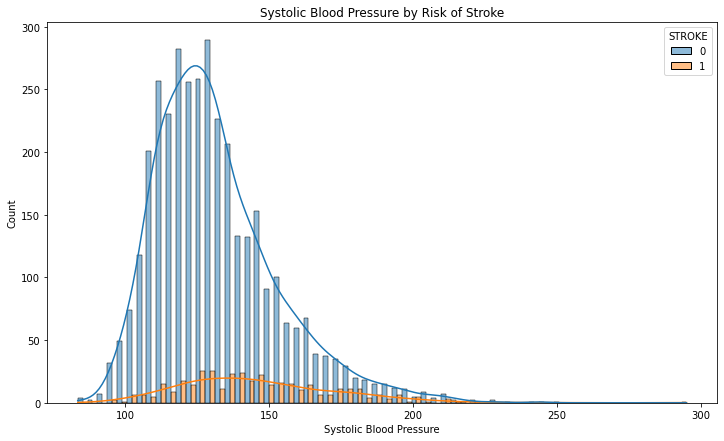

In [66]:
plt.figure(figsize = (12, 7))
plt.title('Systolic Blood Pressure by Risk of Stroke')
plt.xlabel('Systolic Blood Pressure')
sns.histplot(data = framinghamP1, x = 'SYSBP', hue='STROKE', multiple= 'dodge', kde = True)

<AxesSubplot:title={'center':'Systolic Blood Pressure by Risk of Death'}, xlabel='Systolic Blood Pressure', ylabel='Count'>

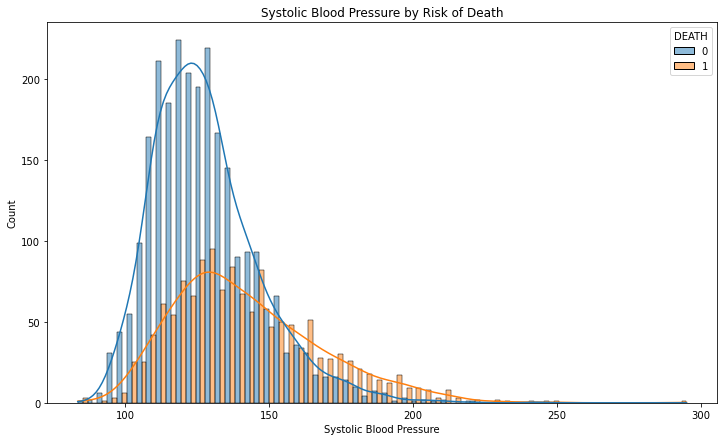

In [67]:
plt.figure(figsize = (12, 7))
plt.title('Systolic Blood Pressure by Risk of Death')
plt.xlabel('Systolic Blood Pressure')
sns.histplot(data = framinghamP1, x = 'SYSBP', hue='DEATH', multiple= 'dodge', kde = True)

### 3. Age

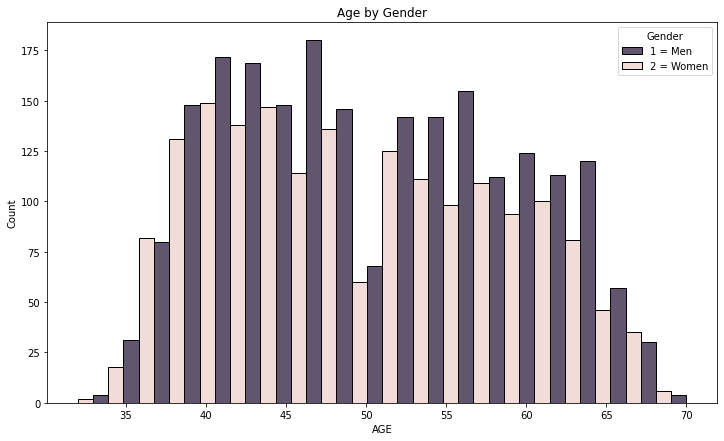

In [181]:
plt.figure(figsize = (12, 7))
plt.title('Age by Gender')
sns.histplot(data = framinghamP1, x = 'AGE', hue='SEX', bins = 20, multiple= 'dodge', legend = False)
plt.legend(title = "Gender", labels=['1 = Men', '2 = Women'])

<AxesSubplot:title={'center':'Death Event by Age'}, xlabel='AGE', ylabel='Count'>

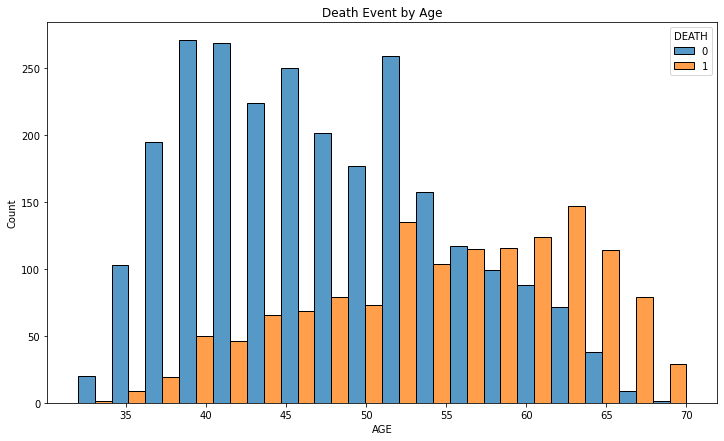

In [69]:
plt.figure(figsize = (12, 7))
plt.title('Death Event by Age')
sns.histplot(data = framinghamP1, x = 'AGE', hue='DEATH', bins = 18, multiple= 'dodge')

<AxesSubplot:title={'center':'Coronary Heart Disease by Age'}, xlabel='AGE', ylabel='Count'>

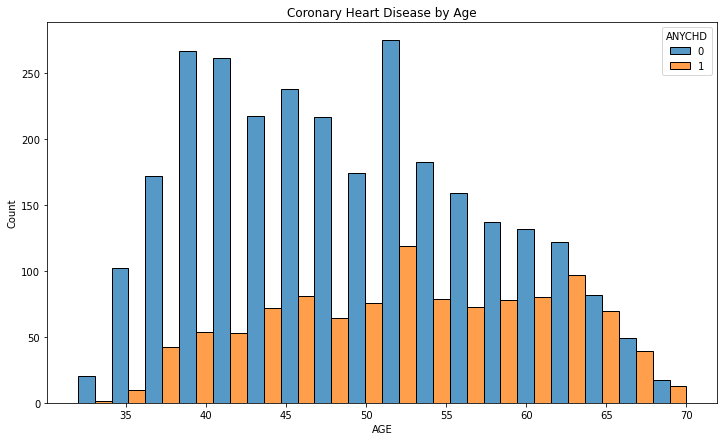

In [70]:
plt.figure(figsize = (12, 7))
plt.title('Coronary Heart Disease by Age')
sns.histplot(data = framinghamP1, x = 'AGE', hue='ANYCHD', bins = 18, multiple= 'dodge')

<AxesSubplot:title={'center':'Stroke Events by Age'}, xlabel='AGE', ylabel='Count'>

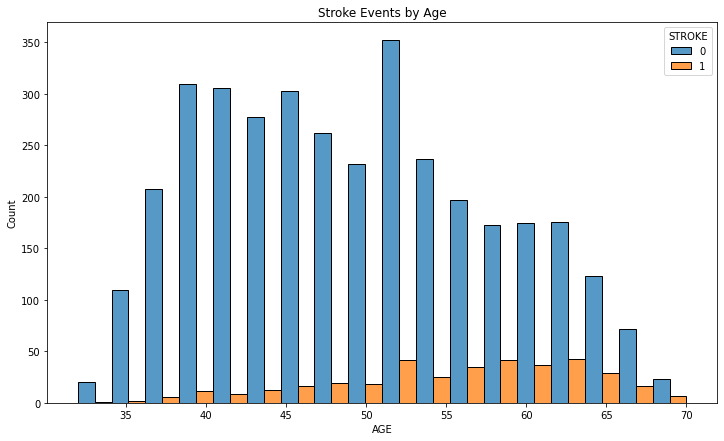

In [71]:
plt.figure(figsize = (12, 7))
plt.title('Stroke Events by Age')
sns.histplot(data = framinghamP1, x = 'AGE', hue='STROKE', bins = 18, multiple= 'dodge')

# k-Means Clustering
---

* k-Means clustering is an unsupervised machine learning that separates data into groups that are similar

## Additional Packages

In [72]:
from sklearn.cluster import KMeans

## Data Wrangling
* KMeans does not accept string data, but this dataset is fully numeric
* Subsetting to continuous variables and the predictor variables

In [73]:
framinghamP1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3927 entries, 0 to 11624
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    3927 non-null   int64  
 1   SEX       3927 non-null   int64  
 2   AGE       3927 non-null   int64  
 3   SYSBP     3927 non-null   float64
 4   DIABP     3927 non-null   float64
 5   BPMEDS    3927 non-null   int64  
 6   CURSMOKE  3927 non-null   int64  
 7   CIGPDAY   3927 non-null   int64  
 8   TOTCHOL   3927 non-null   int64  
 9   BMI       3927 non-null   float64
 10  GLUCOSE   3927 non-null   int64  
 11  DIABETES  3927 non-null   int64  
 12  HEARTRTE  3927 non-null   int64  
 13  PREVHYP   3927 non-null   int64  
 14  ANYCHD    3927 non-null   int64  
 15  STROKE    3927 non-null   int64  
 16  DEATH     3927 non-null   int64  
dtypes: float64(3), int64(14)
memory usage: 552.2 KB


In [75]:
frmgP1TrimmedCHD = framinghamP1[['AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'TOTCHOL', 'BMI', 'GLUCOSE', 'HEARTRTE', 'ANYCHD']].copy()
frmgP1TrimmedCHD.head()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,HEARTRTE,ANYCHD
0,39,106.0,70.0,0,0,195,26.97,77,80,1
2,46,121.0,81.0,0,0,250,28.73,76,95,0
5,48,127.5,80.0,1,20,245,25.34,70,75,0
7,61,150.0,95.0,1,30,225,28.58,103,65,0
9,46,130.0,84.0,1,23,285,23.10,85,85,0


In [76]:
frmgP1TrimmedSTK = framinghamP1[['AGE', 'SYSBP', 'DIABP', 'CIGPDAY', 'TOTCHOL', 'BMI', 'HEARTRTE', 'STROKE']].copy()
frmgP1TrimmedSTK.head()

,AGE,SYSBP,DIABP,CIGPDAY,TOTCHOL,BMI,HEARTRTE,STROKE
0,39,106.0,70.0,0,195,26.97,80,0
2,46,121.0,81.0,0,250,28.73,95,0
5,48,127.5,80.0,20,245,25.34,75,0
7,61,150.0,95.0,30,225,28.58,65,1
9,46,130.0,84.0,23,285,23.10,85,0


In [77]:
frmgP1TrimmedDTH = framinghamP1[['AGE', 'SYSBP', 'DIABP', 'CIGPDAY', 'TOTCHOL', 'BMI', 'HEARTRTE', 'DEATH']].copy()
frmgP1TrimmedDTH.head()

,AGE,SYSBP,DIABP,CIGPDAY,TOTCHOL,BMI,HEARTRTE,DEATH
0,39,106.0,70.0,0,195,26.97,80,0
2,46,121.0,81.0,0,250,28.73,95,0
5,48,127.5,80.0,20,245,25.34,75,0
7,61,150.0,95.0,30,225,28.58,65,1
9,46,130.0,84.0,23,285,23.10,85,0


# CHD
---

## Perform k-Means Clustering

### Testing 2 clusters

In [78]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(frmgP1TrimmedCHD)

KMeans(n_clusters=2)

In [79]:
frmgP1TrimmedCHD['Group'] = kmeans.labels_
frmgP1TrimmedCHD.head()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,HEARTRTE,ANYCHD,Group
0,39,106.0,70.0,0,0,195,26.97,77,80,1,1
2,46,121.0,81.0,0,0,250,28.73,76,95,0,0
5,48,127.5,80.0,1,20,245,25.34,70,75,0,0
7,61,150.0,95.0,1,30,225,28.58,103,65,0,1
9,46,130.0,84.0,1,23,285,23.10,85,85,0,0


### Investigate Means by Category

In [80]:
frmgP1TrimmedCHD.groupby('Group').mean()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,HEARTRTE,ANYCHD
Group,,,,,,,,,,
0,52.425803,139.483343,86.094488,0.453059,8.497880,278.007874,26.494888,83.443973,77.254997,0.346457
1,48.118190,128.206503,80.981547,0.510105,9.320738,207.609842,25.385975,81.134886,74.636204,0.232425


__*The major differences between the groups are average systolic blood pressure, total cholesterol and a minor difference in average age and average diastolic blood pressure.*__

### Testing 3 Clusters

In [81]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(frmgP1TrimmedCHD)

KMeans(n_clusters=3)

In [82]:
frmgP1TrimmedCHD['Group'] = kmeans.labels_
frmgP1TrimmedCHD.head()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,HEARTRTE,ANYCHD,Group
0,39,106.0,70.0,0,0,195,26.97,77,80,1,1
2,46,121.0,81.0,0,0,250,28.73,76,95,0,0
5,48,127.5,80.0,1,20,245,25.34,70,75,0,0
7,61,150.0,95.0,1,30,225,28.58,103,65,0,0
9,46,130.0,84.0,1,23,285,23.10,85,85,0,2


### Investigate Means by Category

In [83]:
frmgP1TrimmedCHD.groupby('Group').mean()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,HEARTRTE,ANYCHD
Group,,,,,,,,,,
0,51.485520,136.269733,84.852357,0.475866,8.833617,246.006246,26.248007,83.558206,76.582056,0.301533
1,46.755226,125.035401,79.372218,0.523938,9.598786,194.923803,24.992549,79.293324,74.092380,0.195550
2,52.808199,141.561493,86.855051,0.430454,7.983895,306.327965,26.698170,84.467057,77.130307,0.409956


__*The 3 clusters differ most significantly in average age, systolic blood pressure and total cholesterol.*__

### Testing 4 Clusters

In [84]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(frmgP1TrimmedCHD)

KMeans(n_clusters=4)

In [85]:
frmgP1TrimmedCHD['Group'] = kmeans.labels_
frmgP1TrimmedCHD.head()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,HEARTRTE,ANYCHD,Group
0,39,106.0,70.0,0,0,195,26.97,77,80,1,0
2,46,121.0,81.0,0,0,250,28.73,76,95,0,3
5,48,127.5,80.0,1,20,245,25.34,70,75,0,3
7,61,150.0,95.0,1,30,225,28.58,103,65,0,3
9,46,130.0,84.0,1,23,285,23.10,85,85,0,1


### Investigate Means by Category

In [86]:
frmgP1TrimmedCHD.groupby('Group').mean()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,HEARTRTE,ANYCHD
Group,,,,,,,,,,
0,46.767845,125.108108,79.355856,0.522523,9.516286,194.269577,24.964990,79.204435,74.099792,0.194040
1,52.822416,141.502183,86.888646,0.427948,7.944687,305.567686,26.665226,81.344978,77.135371,0.406114
2,54.574468,149.223404,86.712766,0.340426,6.404255,245.510638,28.226383,251.000000,81.170213,0.617021
3,51.275429,135.616286,84.672857,0.482857,9.001714,245.552000,26.200806,80.260571,76.392571,0.293143


* __*The group with the highest percentage Cardiovascular events (61.7 %) has the highest average age, systolic blood pressure, highest average BMI, glucose, and heart rate and a high total cholesterol.*__
* __*The group with 2nd highest percentage of Cardiovascular events  risk (40.6%) the highest average total cholesterol and a high average systolic BP.*__
* __*The group with lowest percentage of cardiovascular events risk has an average total cholesterol and an average systolic blood pressure within normal limits, and have the lowest average age*__

### Testing 5 Clusters

In [103]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(frmgP1TrimmedCHD)

KMeans(n_clusters=5)

In [104]:
frmgP1TrimmedCHD['Group'] = kmeans.labels_
frmgP1TrimmedCHD.head()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,HEARTRTE,ANYCHD,Group
0,39,106.0,70.0,0,0,195,26.97,77,80,1,0
2,46,121.0,81.0,0,0,250,28.73,76,95,0,3
5,48,127.5,80.0,1,20,245,25.34,70,75,0,3
7,61,150.0,95.0,1,30,225,28.58,103,65,0,2
9,46,130.0,84.0,1,23,285,23.10,85,85,0,1


### Investigate Means by Category

In [105]:
frmgP1TrimmedCHD.groupby('Group').mean()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,HEARTRTE,ANYCHD
Group,,,,,,,,,,
0,46.279180,123.141167,78.401420,0.532334,9.708991,191.928233,24.867776,79.236593,74.078076,0.182965
1,52.757485,140.266467,86.436377,0.434132,7.970060,306.010479,26.532964,81.215569,77.106287,0.387725
2,55.536155,166.573192,98.609347,0.391534,7.291005,235.936508,27.897284,83.400353,79.611993,0.412698
3,49.450000,124.046377,79.393841,0.512319,9.557246,245.645652,25.508094,79.097101,74.838406,0.253623
4,54.954545,150.295455,87.011364,0.340909,6.500000,249.181818,28.323864,255.977273,81.022727,0.590909


__*Adding a 5th cluster accentuated that:*__
* __*Having a high glucose level combined with hypertension and hyperlipidemia (group 2) increases the risk for having a CHD event by 1/3 when compared to just having hypertension and hyperlipidemia*__
* __*Severe hyperlipidemia (group 4) or severe hypertension (group 3) puts one at approximately the same risk of having a cardiac event.*__
* __*Being under 50 puts one at lower risk of a cardiac event.*__

## Selecting the number of clusters with silhouette analysis on KMeans clustering
[scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#selecting-the-number-of-clusters-with-silhouette-analysis-on-kmeans-clustering)

In [106]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [107]:
range_n_clusters = [2, 3, 4, 5]
X = frmgP1TrimmedCHD.copy()

In [108]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(frmgP1TrimmedCHD)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(frmgP1TrimmedCHD, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.32018430829781236
For n_clusters = 3 The average silhouette_score is : 0.23528483503369688
For n_clusters = 4 The average silhouette_score is : 0.24549477149046295
For n_clusters = 5 The average silhouette_score is : 0.24205374421631376


__*Using the silhouette score to check the optimal number of clusters shows that the optimal number of clusters is 2. In that case, the 2 features that differ between two clusters is average systolic blood pressure and average total total cholesterol. [Source: Silhouette Coefficient, Towards Data Science](https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c)*__

## kNN Algorithm
---

* Supervised machine learning algorithm that looks at all the data points around the neighbors and decides whether data should be classified into one type or another based on the closest data points
* The higher the k the more bias you introduce. The results will be much cleaner, but you will falsely categorize more data points


## Additional Packages

In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [110]:
frmgP1TrimmedCHD.head()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,HEARTRTE,ANYCHD,Group
0,39,106.0,70.0,0,0,195,26.97,77,80,1,0
2,46,121.0,81.0,0,0,250,28.73,76,95,0,3
5,48,127.5,80.0,1,20,245,25.34,70,75,0,3
7,61,150.0,95.0,1,30,225,28.58,103,65,0,2
9,46,130.0,84.0,1,23,285,23.10,85,85,0,1


In [111]:
frmgP1TrimmedCHD.drop('Group', axis = 1, inplace = True)
frmgP1TrimmedCHD.head()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,HEARTRTE,ANYCHD
0,39,106.0,70.0,0,0,195,26.97,77,80,1
2,46,121.0,81.0,0,0,250,28.73,76,95,0
5,48,127.5,80.0,1,20,245,25.34,70,75,0
7,61,150.0,95.0,1,30,225,28.58,103,65,0
9,46,130.0,84.0,1,23,285,23.10,85,85,0


## Scale Data

In [112]:
scaler = StandardScaler()
scaler.fit(frmgP1TrimmedCHD.drop('ANYCHD',axis=1))
scaledVariables = scaler.transform(frmgP1TrimmedCHD.drop('ANYCHD',axis=1))
scaledVariables[1]
frmgP1ScaledCHD = pd.DataFrame(scaledVariables, columns=frmgP1TrimmedCHD.columns[:-1]) # leaves out predictor variable
frmgP1ScaledCHD.head()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,HEARTRTE
0,-1.259069,-1.202072,-1.087855,-0.972618,-0.751371,-0.944321,0.273900,-0.209554,0.353756
1,-0.452653,-0.532954,-0.176555,-0.972618,-0.751371,0.286232,0.705156,-0.250598,1.598560
2,-0.222249,-0.243003,-0.259401,1.028153,0.923032,0.174363,-0.125502,-0.496858,-0.061178
3,1.275379,0.760673,0.983280,1.028153,1.760234,-0.273111,0.668401,0.857574,-0.891048
4,-0.452653,-0.131483,0.071981,1.028153,1.174193,1.069311,-0.674374,0.118793,0.768691


## Train Test Split

In [113]:
x = frmgP1ScaledCHD
y = frmgP1TrimmedCHD['ANYCHD']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

## kNN Analysis

In [131]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[621 242]
 [203 113]]
              precision    recall  f1-score   support

           0       0.75      0.72      0.74       863
           1       0.32      0.36      0.34       316

    accuracy                           0.62      1179
   macro avg       0.54      0.54      0.54      1179
weighted avg       0.64      0.62      0.63      1179



## Choose the Best Model

In [132]:
errorRate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predI = knn.predict(x_test)
    errorRate.append(np.mean(predI != y_test))
    
min(errorRate)

0.272264631043257

In [133]:
errorRate.index(min(errorRate))

37

Text(0, 0.5, 'Error Rate')

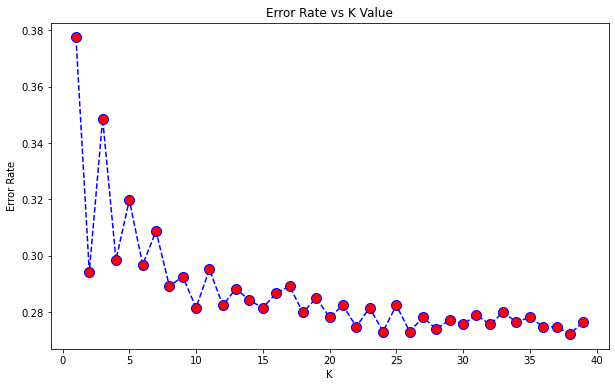

In [134]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Run the Final Model
* Even though the minimum error is 37, using a k that high will introduce bias, so we choose to use k = 10

In [135]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[807  56]
 [276  40]]
              precision    recall  f1-score   support

           0       0.75      0.94      0.83       863
           1       0.42      0.13      0.19       316

    accuracy                           0.72      1179
   macro avg       0.58      0.53      0.51      1179
weighted avg       0.66      0.72      0.66      1179



__*The overall accuracy for this model is 72% and overall precisionis 66%, however the number of true positive rate (recall) is much lower than in the model with k=1 [Confusion Matrices, Towards Data Science](https://towardsdatascience.com/performance-metrics-confusion-matrix-precision-recall-and-f1-score-a8fe076a2262)*__

# Random Forests
---

## Additional packages 

In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [137]:
framinghamP1.head()

,RANDID,SEX,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,DIABETES,HEARTRTE,PREVHYP,ANYCHD,STROKE,DEATH
0,2448,1,39,106.0,70.0,0,0,0,195,26.97,77,0,80,0,1,0,0
2,6238,2,46,121.0,81.0,0,0,0,250,28.73,76,0,95,0,0,0,0
5,9428,1,48,127.5,80.0,0,1,20,245,25.34,70,0,75,0,0,0,0
7,10552,2,61,150.0,95.0,0,1,30,225,28.58,103,0,65,1,0,1,1
9,11252,2,46,130.0,84.0,0,1,23,285,23.10,85,0,85,0,0,0,0


## Train Test Split

In [153]:
x = framinghamP1.drop(['RANDID', 'ANYCHD', 'STROKE','DEATH'], axis = 1)
y = framinghamP1['ANYCHD']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

## Initial Random Forest Model

In [154]:
forest = RandomForestClassifier(n_estimators=500, random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=76)

## Evaluate Model Fit

In [155]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[764  80]
 [263  72]]
              precision    recall  f1-score   support

           0       0.74      0.91      0.82       844
           1       0.47      0.21      0.30       335

    accuracy                           0.71      1179
   macro avg       0.61      0.56      0.56      1179
weighted avg       0.67      0.71      0.67      1179



__*The model is has an accuracy of 72%*__

# Hyperparameter Tuning

## Additional Packages

In [156]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

## Number of Estimators

In [157]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)

1 : 0.635284139100933
4 : 0.6980491942324003
5 : 0.6709075487701441
8 : 0.6921119592875318
10 : 0.7022900763358778
20 : 0.6972010178117048
50 : 0.712468193384224
75 : 0.712468193384224
100 : 0.714164546225615
250 : 0.7116200169635284
500 : 0.7090754877014419


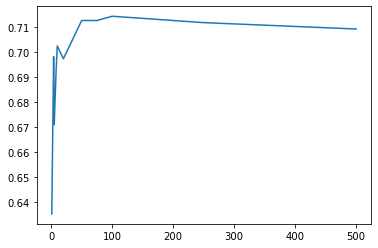

In [158]:
plt.plot(n_estimators_array, results)

In [159]:
max(results)

0.714164546225615

In [160]:
n_est = n_estimators_array[results.index(max(results))]
n_est

100

__*The optimal number of estimators is 100*__

## Tuning the Remaing Tree Parameters

In [161]:
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [162]:
rf = RandomForestClassifier(n_estimators=n_est)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=42)
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['auto', None, 'log2'],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=42)

In [163]:
params = rf_random.best_params_
params

{'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10}

## Tuned Random Forest

In [164]:
forest = RandomForestClassifier(n_estimators=n_est,min_samples_leaf=params.get('min_samples_leaf'), 
                                max_features=params.get('max_features'), max_depth=params.get('max_depth'))
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=10)

In [165]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[789  55]
 [271  64]]
              precision    recall  f1-score   support

           0       0.74      0.93      0.83       844
           1       0.54      0.19      0.28       335

    accuracy                           0.72      1179
   macro avg       0.64      0.56      0.56      1179
weighted avg       0.69      0.72      0.67      1179



__*The tunned model has a 83% overall accuracy*__

## Feature Importance

In [166]:
feature_importances = pd.Series(forest.feature_importances_, index=x.columns)

In [167]:
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

SYSBP       0.143201
TOTCHOL     0.127624
BMI         0.125514
AGE         0.120662
GLUCOSE     0.111613
DIABP       0.110469
HEARTRTE    0.091343
SEX         0.062803
CIGPDAY     0.046057
PREVHYP     0.022922
DIABETES    0.014462
BPMEDS      0.012017
CURSMOKE    0.011313
dtype: float64


<AxesSubplot:>

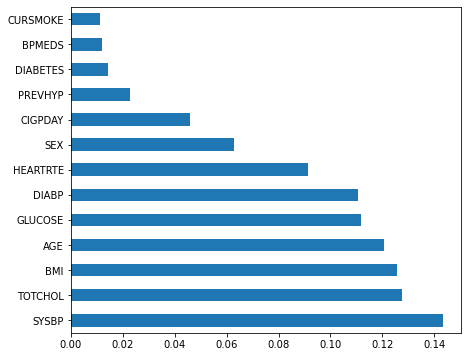

In [168]:
feature_importances.plot(kind='barh', figsize=(7,6))

## Reducing the number of variables to the ones more significant

In [169]:
framinghamP1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3927 entries, 0 to 11624
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    3927 non-null   int64  
 1   SEX       3927 non-null   int64  
 2   AGE       3927 non-null   int64  
 3   SYSBP     3927 non-null   float64
 4   DIABP     3927 non-null   float64
 5   BPMEDS    3927 non-null   int64  
 6   CURSMOKE  3927 non-null   int64  
 7   CIGPDAY   3927 non-null   int64  
 8   TOTCHOL   3927 non-null   int64  
 9   BMI       3927 non-null   float64
 10  GLUCOSE   3927 non-null   int64  
 11  DIABETES  3927 non-null   int64  
 12  HEARTRTE  3927 non-null   int64  
 13  PREVHYP   3927 non-null   int64  
 14  ANYCHD    3927 non-null   int64  
 15  STROKE    3927 non-null   int64  
 16  DEATH     3927 non-null   int64  
dtypes: float64(3), int64(14)
memory usage: 552.2 KB


## Train Test Split

In [199]:
x = framinghamP1.drop(['RANDID', 'ANYCHD', 'STROKE','DEATH', 'CURSMOKE', 'BPMEDS', 'DIABETES', 'PREVHYP', 'CIGPDAY'], axis = 1)
y = framinghamP1['ANYCHD']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

## Initial Random Forest Model

In [204]:
forest = RandomForestClassifier(n_estimators=500, random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=76)

## Evaluate Model Fit

In [205]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[764  80]
 [252  83]]
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       844
           1       0.51      0.25      0.33       335

    accuracy                           0.72      1179
   macro avg       0.63      0.58      0.58      1179
weighted avg       0.68      0.72      0.68      1179



__*This model is has an accuracy of 72% and an overall precision of 68%.*__

# Hyperparameter Tuning

## Additional Packages

In [206]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

## Number of Estimators

In [207]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)

1 : 0.5996607294317218
4 : 0.6827820186598813
5 : 0.6666666666666666
8 : 0.6776929601357082
10 : 0.6878710771840543
20 : 0.7005937234944869
50 : 0.7039864291772688
75 : 0.7048346055979644
100 : 0.7073791348600509
250 : 0.7133163698049194
500 : 0.7184054283290925


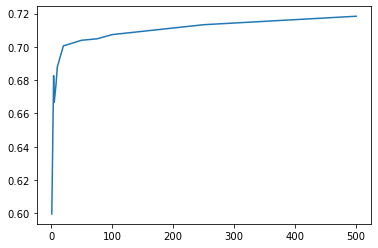

In [175]:
plt.plot(n_estimators_array, results)

In [176]:
max(results)

0.7184054283290925

In [177]:
n_est = n_estimators_array[results.index(max(results))]
n_est

500

__*The optimal number of estimators is 500*__

## Tuning the Remaing Tree Parameters

In [178]:
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [179]:
rf = RandomForestClassifier(n_estimators=n_est)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=42)
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=500),
                   n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['auto', None, 'log2'],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=42)

In [180]:
params = rf_random.best_params_
params

{'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 70}

## Tuned Random Forest

In [182]:
forest = RandomForestClassifier(n_estimators=n_est,min_samples_leaf=params.get('min_samples_leaf'), 
                                max_features=params.get('max_features'), max_depth=params.get('max_depth'))
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=70, max_features='log2', min_samples_leaf=2,
                       n_estimators=500)

In [183]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[759  85]
 [260  75]]
              precision    recall  f1-score   support

           0       0.74      0.90      0.81       844
           1       0.47      0.22      0.30       335

    accuracy                           0.71      1179
   macro avg       0.61      0.56      0.56      1179
weighted avg       0.67      0.71      0.67      1179



__*The tunned model has a lower overall precision, accuracy and a lower number of True Positives*__

## Feature Importance

In [184]:
feature_importances = pd.Series(forest.feature_importances_, index=x.columns)

In [185]:
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

BMI         0.158177
SYSBP       0.153963
TOTCHOL     0.150957
GLUCOSE     0.130836
DIABP       0.127600
AGE         0.127241
HEARTRTE    0.106062
SEX         0.045164
dtype: float64


<AxesSubplot:>

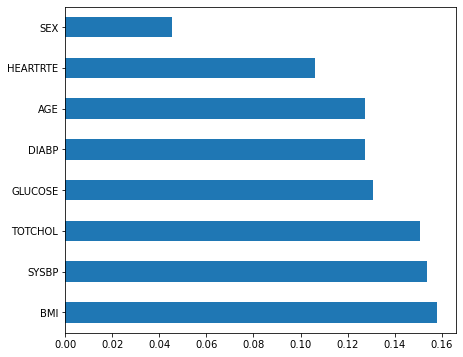

In [186]:
feature_importances.plot(kind='barh', figsize=(7,6))

# CHD
---

## Perform k-Means Clustering

### Testing 2 clusters

In [78]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(frmgP1TrimmedCHD)

KMeans(n_clusters=2)

In [79]:
frmgP1TrimmedCHD['Group'] = kmeans.labels_
frmgP1TrimmedCHD.head()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,HEARTRTE,ANYCHD,Group
0,39,106.0,70.0,0,0,195,26.97,77,80,1,1
2,46,121.0,81.0,0,0,250,28.73,76,95,0,0
5,48,127.5,80.0,1,20,245,25.34,70,75,0,0
7,61,150.0,95.0,1,30,225,28.58,103,65,0,1
9,46,130.0,84.0,1,23,285,23.10,85,85,0,0


### Investigate Means by Category

In [80]:
frmgP1TrimmedCHD.groupby('Group').mean()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,HEARTRTE,ANYCHD
Group,,,,,,,,,,
0,52.425803,139.483343,86.094488,0.453059,8.497880,278.007874,26.494888,83.443973,77.254997,0.346457
1,48.118190,128.206503,80.981547,0.510105,9.320738,207.609842,25.385975,81.134886,74.636204,0.232425


__*The major differences between the groups are average systolic blood pressure, total cholesterol and a minor difference in average age and average diastolic blood pressure.*__

### Testing 3 Clusters

In [81]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(frmgP1TrimmedCHD)

KMeans(n_clusters=3)

In [82]:
frmgP1TrimmedCHD['Group'] = kmeans.labels_
frmgP1TrimmedCHD.head()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,HEARTRTE,ANYCHD,Group
0,39,106.0,70.0,0,0,195,26.97,77,80,1,1
2,46,121.0,81.0,0,0,250,28.73,76,95,0,0
5,48,127.5,80.0,1,20,245,25.34,70,75,0,0
7,61,150.0,95.0,1,30,225,28.58,103,65,0,0
9,46,130.0,84.0,1,23,285,23.10,85,85,0,2


### Investigate Means by Category

In [83]:
frmgP1TrimmedCHD.groupby('Group').mean()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,HEARTRTE,ANYCHD
Group,,,,,,,,,,
0,51.485520,136.269733,84.852357,0.475866,8.833617,246.006246,26.248007,83.558206,76.582056,0.301533
1,46.755226,125.035401,79.372218,0.523938,9.598786,194.923803,24.992549,79.293324,74.092380,0.195550
2,52.808199,141.561493,86.855051,0.430454,7.983895,306.327965,26.698170,84.467057,77.130307,0.409956


__*The 3 clusters differ most significantly in average age, systolic blood pressure and total cholesterol.*__

### Testing 4 Clusters

In [84]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(frmgP1TrimmedCHD)

KMeans(n_clusters=4)

In [85]:
frmgP1TrimmedCHD['Group'] = kmeans.labels_
frmgP1TrimmedCHD.head()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,HEARTRTE,ANYCHD,Group
0,39,106.0,70.0,0,0,195,26.97,77,80,1,0
2,46,121.0,81.0,0,0,250,28.73,76,95,0,3
5,48,127.5,80.0,1,20,245,25.34,70,75,0,3
7,61,150.0,95.0,1,30,225,28.58,103,65,0,3
9,46,130.0,84.0,1,23,285,23.10,85,85,0,1


### Investigate Means by Category

In [86]:
frmgP1TrimmedCHD.groupby('Group').mean()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,HEARTRTE,ANYCHD
Group,,,,,,,,,,
0,46.767845,125.108108,79.355856,0.522523,9.516286,194.269577,24.964990,79.204435,74.099792,0.194040
1,52.822416,141.502183,86.888646,0.427948,7.944687,305.567686,26.665226,81.344978,77.135371,0.406114
2,54.574468,149.223404,86.712766,0.340426,6.404255,245.510638,28.226383,251.000000,81.170213,0.617021
3,51.275429,135.616286,84.672857,0.482857,9.001714,245.552000,26.200806,80.260571,76.392571,0.293143


* __*The group with the highest percentage Cardiovascular events (61.7 %) has the highest average age, systolic blood pressure, highest average BMI, glucose, and heart rate and a high total cholesterol.*__
* __*The group with 2nd highest percentage of Cardiovascular events  risk (40.6%) the highest average total cholesterol and a high average systolic BP.*__
* __*The group with lowest percentage of cardiovascular events risk has an average total cholesterol and an average systolic blood pressure within normal limits, and have the lowest average age*__

### Testing 5 Clusters

In [103]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(frmgP1TrimmedCHD)

KMeans(n_clusters=5)

In [104]:
frmgP1TrimmedCHD['Group'] = kmeans.labels_
frmgP1TrimmedCHD.head()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,HEARTRTE,ANYCHD,Group
0,39,106.0,70.0,0,0,195,26.97,77,80,1,0
2,46,121.0,81.0,0,0,250,28.73,76,95,0,3
5,48,127.5,80.0,1,20,245,25.34,70,75,0,3
7,61,150.0,95.0,1,30,225,28.58,103,65,0,2
9,46,130.0,84.0,1,23,285,23.10,85,85,0,1


### Investigate Means by Category

In [105]:
frmgP1TrimmedCHD.groupby('Group').mean()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,HEARTRTE,ANYCHD
Group,,,,,,,,,,
0,46.279180,123.141167,78.401420,0.532334,9.708991,191.928233,24.867776,79.236593,74.078076,0.182965
1,52.757485,140.266467,86.436377,0.434132,7.970060,306.010479,26.532964,81.215569,77.106287,0.387725
2,55.536155,166.573192,98.609347,0.391534,7.291005,235.936508,27.897284,83.400353,79.611993,0.412698
3,49.450000,124.046377,79.393841,0.512319,9.557246,245.645652,25.508094,79.097101,74.838406,0.253623
4,54.954545,150.295455,87.011364,0.340909,6.500000,249.181818,28.323864,255.977273,81.022727,0.590909


__*Adding a 5th cluster accentuated that:*__
* __*Having a high glucose level combined with hypertension and hyperlipidemia (group 2) increases the risk for having a CHD event by 1/3 when compared to just having hypertension and hyperlipidemia*__
* __*Severe hyperlipidemia (group 4) or severe hypertension (group 3) puts one at approximately the same risk of having a cardiac event.*__
* __*Being under 50 puts one at lower risk of a cardiac event.*__

## Selecting the number of clusters with silhouette analysis on KMeans clustering
[scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#selecting-the-number-of-clusters-with-silhouette-analysis-on-kmeans-clustering)

In [106]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [107]:
range_n_clusters = [2, 3, 4, 5]
X = frmgP1TrimmedCHD.copy()

In [108]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(frmgP1TrimmedCHD)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(frmgP1TrimmedCHD, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.32018430829781236
For n_clusters = 3 The average silhouette_score is : 0.23528483503369688
For n_clusters = 4 The average silhouette_score is : 0.24549477149046295
For n_clusters = 5 The average silhouette_score is : 0.24205374421631376


__*Using the silhouette score to check the optimal number of clusters shows that the optimal number of clusters is 2. In that case, the 2 features that differ between two clusters is average systolic blood pressure and average total total cholesterol. [Source: Silhouette Coefficient, Towards Data Science](https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c)*__

## kNN Algorithm
---

* Supervised machine learning algorithm that looks at all the data points around the neighbors and decides whether data should be classified into one type or another based on the closest data points
* The higher the k the more bias you introduce. The results will be much cleaner, but you will falsely categorize more data points


## Additional Packages

In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [110]:
frmgP1TrimmedCHD.head()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,HEARTRTE,ANYCHD,Group
0,39,106.0,70.0,0,0,195,26.97,77,80,1,0
2,46,121.0,81.0,0,0,250,28.73,76,95,0,3
5,48,127.5,80.0,1,20,245,25.34,70,75,0,3
7,61,150.0,95.0,1,30,225,28.58,103,65,0,2
9,46,130.0,84.0,1,23,285,23.10,85,85,0,1


In [111]:
frmgP1TrimmedCHD.drop('Group', axis = 1, inplace = True)
frmgP1TrimmedCHD.head()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,HEARTRTE,ANYCHD
0,39,106.0,70.0,0,0,195,26.97,77,80,1
2,46,121.0,81.0,0,0,250,28.73,76,95,0
5,48,127.5,80.0,1,20,245,25.34,70,75,0
7,61,150.0,95.0,1,30,225,28.58,103,65,0
9,46,130.0,84.0,1,23,285,23.10,85,85,0


## Scale Data

In [112]:
scaler = StandardScaler()
scaler.fit(frmgP1TrimmedCHD.drop('ANYCHD',axis=1))
scaledVariables = scaler.transform(frmgP1TrimmedCHD.drop('ANYCHD',axis=1))
scaledVariables[1]
frmgP1ScaledCHD = pd.DataFrame(scaledVariables, columns=frmgP1TrimmedCHD.columns[:-1]) # leaves out predictor variable
frmgP1ScaledCHD.head()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,HEARTRTE
0,-1.259069,-1.202072,-1.087855,-0.972618,-0.751371,-0.944321,0.273900,-0.209554,0.353756
1,-0.452653,-0.532954,-0.176555,-0.972618,-0.751371,0.286232,0.705156,-0.250598,1.598560
2,-0.222249,-0.243003,-0.259401,1.028153,0.923032,0.174363,-0.125502,-0.496858,-0.061178
3,1.275379,0.760673,0.983280,1.028153,1.760234,-0.273111,0.668401,0.857574,-0.891048
4,-0.452653,-0.131483,0.071981,1.028153,1.174193,1.069311,-0.674374,0.118793,0.768691


## Train Test Split

In [113]:
x = frmgP1ScaledCHD
y = frmgP1TrimmedCHD['ANYCHD']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

## kNN Analysis

In [131]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[621 242]
 [203 113]]
              precision    recall  f1-score   support

           0       0.75      0.72      0.74       863
           1       0.32      0.36      0.34       316

    accuracy                           0.62      1179
   macro avg       0.54      0.54      0.54      1179
weighted avg       0.64      0.62      0.63      1179



## Choose the Best Model

In [132]:
errorRate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predI = knn.predict(x_test)
    errorRate.append(np.mean(predI != y_test))
    
min(errorRate)

0.272264631043257

In [133]:
errorRate.index(min(errorRate))

37

Text(0, 0.5, 'Error Rate')

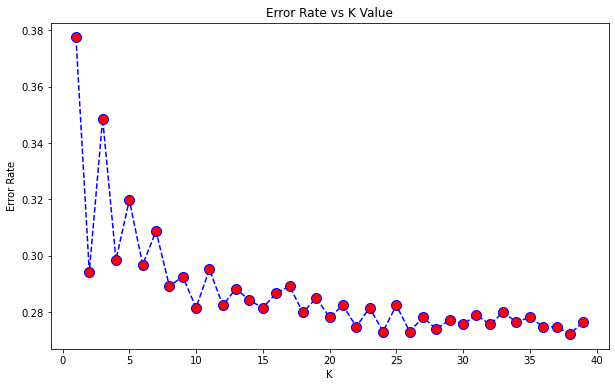

In [134]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Run the Final Model
* Even though the minimum error is 37, using a k that high will introduce bias, so we choose to use k = 10

In [135]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[807  56]
 [276  40]]
              precision    recall  f1-score   support

           0       0.75      0.94      0.83       863
           1       0.42      0.13      0.19       316

    accuracy                           0.72      1179
   macro avg       0.58      0.53      0.51      1179
weighted avg       0.66      0.72      0.66      1179



__*The overall accuracy for this model is 72% and overall precisionis 66%, however the number of true positive rate (recall) is much lower than in the model with k=1 [Confusion Matrices, Towards Data Science](https://towardsdatascience.com/performance-metrics-confusion-matrix-precision-recall-and-f1-score-a8fe076a2262)*__

# Random Forests
---

## Additional packages 

In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [137]:
framinghamP1.head()

,RANDID,SEX,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,DIABETES,HEARTRTE,PREVHYP,ANYCHD,STROKE,DEATH
0,2448,1,39,106.0,70.0,0,0,0,195,26.97,77,0,80,0,1,0,0
2,6238,2,46,121.0,81.0,0,0,0,250,28.73,76,0,95,0,0,0,0
5,9428,1,48,127.5,80.0,0,1,20,245,25.34,70,0,75,0,0,0,0
7,10552,2,61,150.0,95.0,0,1,30,225,28.58,103,0,65,1,0,1,1
9,11252,2,46,130.0,84.0,0,1,23,285,23.10,85,0,85,0,0,0,0


## Train Test Split

In [153]:
x = framinghamP1.drop(['RANDID', 'ANYCHD', 'STROKE','DEATH'], axis = 1)
y = framinghamP1['ANYCHD']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

## Initial Random Forest Model

In [154]:
forest = RandomForestClassifier(n_estimators=500, random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=76)

## Evaluate Model Fit

In [155]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[764  80]
 [263  72]]
              precision    recall  f1-score   support

           0       0.74      0.91      0.82       844
           1       0.47      0.21      0.30       335

    accuracy                           0.71      1179
   macro avg       0.61      0.56      0.56      1179
weighted avg       0.67      0.71      0.67      1179



__*The model is has an accuracy of 72%*__

# Hyperparameter Tuning

## Additional Packages

In [156]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

## Number of Estimators

In [157]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)

1 : 0.635284139100933
4 : 0.6980491942324003
5 : 0.6709075487701441
8 : 0.6921119592875318
10 : 0.7022900763358778
20 : 0.6972010178117048
50 : 0.712468193384224
75 : 0.712468193384224
100 : 0.714164546225615
250 : 0.7116200169635284
500 : 0.7090754877014419


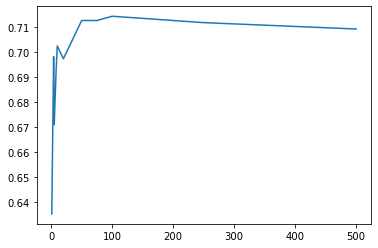

In [158]:
plt.plot(n_estimators_array, results)

In [159]:
max(results)

0.714164546225615

In [160]:
n_est = n_estimators_array[results.index(max(results))]
n_est

100

__*The optimal number of estimators is 100*__

## Tuning the Remaing Tree Parameters

In [161]:
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [162]:
rf = RandomForestClassifier(n_estimators=n_est)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=42)
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['auto', None, 'log2'],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=42)

In [163]:
params = rf_random.best_params_
params

{'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10}

## Tuned Random Forest

In [164]:
forest = RandomForestClassifier(n_estimators=n_est,min_samples_leaf=params.get('min_samples_leaf'), 
                                max_features=params.get('max_features'), max_depth=params.get('max_depth'))
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=10)

In [165]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[789  55]
 [271  64]]
              precision    recall  f1-score   support

           0       0.74      0.93      0.83       844
           1       0.54      0.19      0.28       335

    accuracy                           0.72      1179
   macro avg       0.64      0.56      0.56      1179
weighted avg       0.69      0.72      0.67      1179



__*The tunned model has a 83% overall accuracy*__

## Feature Importance

In [166]:
feature_importances = pd.Series(forest.feature_importances_, index=x.columns)

In [167]:
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

SYSBP       0.143201
TOTCHOL     0.127624
BMI         0.125514
AGE         0.120662
GLUCOSE     0.111613
DIABP       0.110469
HEARTRTE    0.091343
SEX         0.062803
CIGPDAY     0.046057
PREVHYP     0.022922
DIABETES    0.014462
BPMEDS      0.012017
CURSMOKE    0.011313
dtype: float64


<AxesSubplot:>

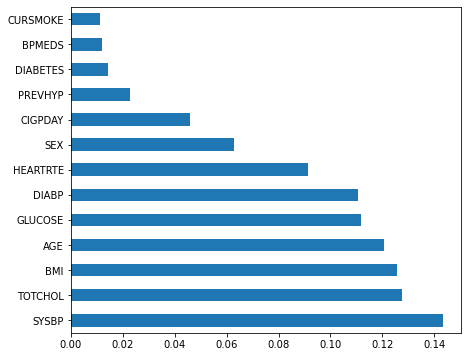

In [168]:
feature_importances.plot(kind='barh', figsize=(7,6))

## Reducing the number of variables to the ones more significant

In [169]:
framinghamP1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3927 entries, 0 to 11624
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    3927 non-null   int64  
 1   SEX       3927 non-null   int64  
 2   AGE       3927 non-null   int64  
 3   SYSBP     3927 non-null   float64
 4   DIABP     3927 non-null   float64
 5   BPMEDS    3927 non-null   int64  
 6   CURSMOKE  3927 non-null   int64  
 7   CIGPDAY   3927 non-null   int64  
 8   TOTCHOL   3927 non-null   int64  
 9   BMI       3927 non-null   float64
 10  GLUCOSE   3927 non-null   int64  
 11  DIABETES  3927 non-null   int64  
 12  HEARTRTE  3927 non-null   int64  
 13  PREVHYP   3927 non-null   int64  
 14  ANYCHD    3927 non-null   int64  
 15  STROKE    3927 non-null   int64  
 16  DEATH     3927 non-null   int64  
dtypes: float64(3), int64(14)
memory usage: 552.2 KB


## Train Test Split

In [199]:
x = framinghamP1.drop(['RANDID', 'ANYCHD', 'STROKE','DEATH', 'CURSMOKE', 'BPMEDS', 'DIABETES', 'PREVHYP', 'CIGPDAY'], axis = 1)
y = framinghamP1['ANYCHD']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

## Initial Random Forest Model

In [204]:
forest = RandomForestClassifier(n_estimators=500, random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=76)

## Evaluate Model Fit

In [205]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[764  80]
 [252  83]]
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       844
           1       0.51      0.25      0.33       335

    accuracy                           0.72      1179
   macro avg       0.63      0.58      0.58      1179
weighted avg       0.68      0.72      0.68      1179



__*This model is has an accuracy of 72% and an overall precision of 68%.*__

# Hyperparameter Tuning

## Additional Packages

In [206]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

## Number of Estimators

In [207]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)

1 : 0.5996607294317218
4 : 0.6827820186598813
5 : 0.6666666666666666
8 : 0.6776929601357082
10 : 0.6878710771840543
20 : 0.7005937234944869
50 : 0.7039864291772688
75 : 0.7048346055979644
100 : 0.7073791348600509
250 : 0.7133163698049194
500 : 0.7184054283290925


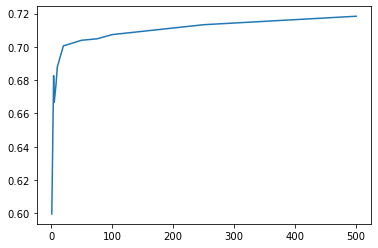

In [175]:
plt.plot(n_estimators_array, results)

In [176]:
max(results)

0.7184054283290925

In [177]:
n_est = n_estimators_array[results.index(max(results))]
n_est

500

__*The optimal number of estimators is 500*__

## Tuning the Remaing Tree Parameters

In [178]:
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [179]:
rf = RandomForestClassifier(n_estimators=n_est)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=42)
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=500),
                   n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['auto', None, 'log2'],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=42)

In [180]:
params = rf_random.best_params_
params

{'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 70}

## Tuned Random Forest

In [182]:
forest = RandomForestClassifier(n_estimators=n_est,min_samples_leaf=params.get('min_samples_leaf'), 
                                max_features=params.get('max_features'), max_depth=params.get('max_depth'))
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=70, max_features='log2', min_samples_leaf=2,
                       n_estimators=500)

In [183]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[759  85]
 [260  75]]
              precision    recall  f1-score   support

           0       0.74      0.90      0.81       844
           1       0.47      0.22      0.30       335

    accuracy                           0.71      1179
   macro avg       0.61      0.56      0.56      1179
weighted avg       0.67      0.71      0.67      1179



__*The tunned model has a lower overall precision, accuracy and a lower number of True Positives*__

## Feature Importance

In [184]:
feature_importances = pd.Series(forest.feature_importances_, index=x.columns)

In [185]:
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

BMI         0.158177
SYSBP       0.153963
TOTCHOL     0.150957
GLUCOSE     0.130836
DIABP       0.127600
AGE         0.127241
HEARTRTE    0.106062
SEX         0.045164
dtype: float64


<AxesSubplot:>

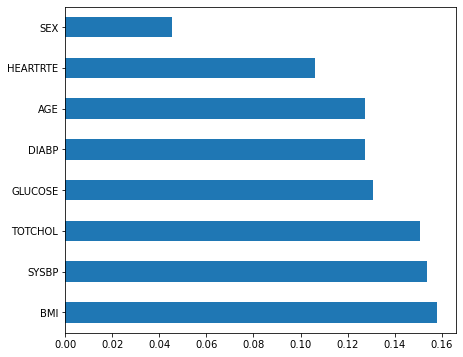

In [186]:
feature_importances.plot(kind='barh', figsize=(7,6))